# main

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import copy
import auxiliary as aux

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':9,
    'ytick.labelsize':9,
    'axes.labelsize':12,
})

import os
import re

%reload_ext autoreload
%autoreload 2

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [4]:
# output directory
src_n = 3
dataDir = f'../data.lbm/{src_n}/'
# dataDir = f'../src/{src_n}/output.lbm/'

# all ticks are found using regular expressions
files = os.listdir(dataDir)
ticks = []

pattern = r'fluidTrj_(\d+)\.csv'

for file in files:
    match = re.search(pattern, file)
    if match:
        ticks.append(int(match.group(1)))
        
ticks.sort()

len(ticks)

100

In [6]:
dataDirs = [f'../data.lbm/{src_n+3}/' for src_n in range(3)]

# Fluid

In [8]:
id = -1

pusher = pd.read_csv(dataDirs[0] + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
pusherParticleDf = pd.read_csv(dataDirs[0]+"particlesTrj.csv")

neutral = pd.read_csv(dataDirs[1] + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
neutralParticleDf = pd.read_csv(dataDirs[1]+"particlesTrj.csv")

puller = pd.read_csv(dataDirs[2] + f"fluidTrj_{ticks[id]}.csv").set_index(["id_x","id_y"]).sort_index()
pullerParticleDf = pd.read_csv(dataDirs[2]+"particlesTrj.csv")

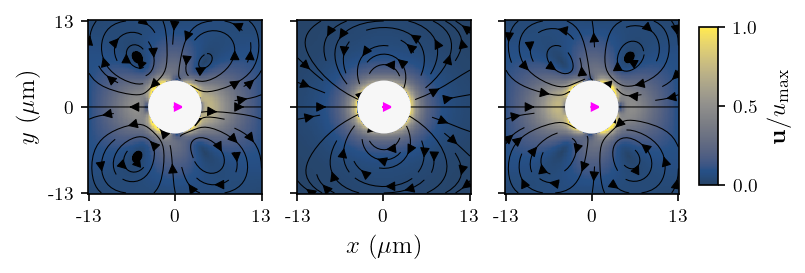

In [10]:
lims = 13
fig, axes = aux.squirmersOverview(pusher, neutral, puller, pusherParticleDf, neutralParticleDf, pullerParticleDf, lims)
plt.savefig("figs/figure1.png", format="png", transparent=True, dpi=72, bbox_inches="tight")
plt.savefig("figs/figure1hd.png", format="png", transparent=True, dpi=300, bbox_inches="tight")
plt.show()

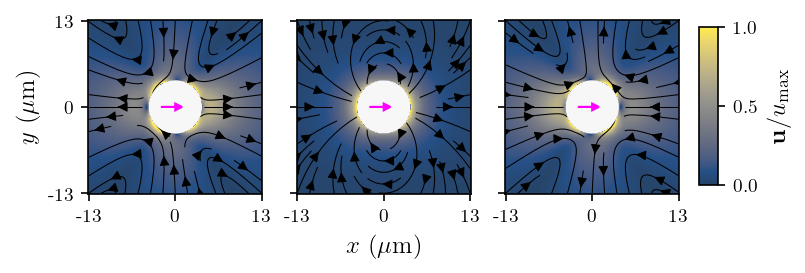

In [7]:
nsDir = '../data.lbm/analyticalResults/'
nsPusher = pd.read_csv(nsDir + '0.csv').set_index(["id_x","id_y"]).sort_index()
nsNeutral = pd.read_csv(nsDir + '1.csv').set_index(["id_x","id_y"]).sort_index()
nsPuller = pd.read_csv(nsDir + '2.csv').set_index(["id_x","id_y"]).sort_index()
fig, axes = aux.NSOverview(nsPusher, nsNeutral, nsPuller, lims)

plt.savefig("figs/NS.png", format="png", transparent=True, dpi=72, bbox_inches="tight")
plt.savefig("figs/NShd.png", format="png", transparent=True, dpi=300, bbox_inches="tight")
plt.show() 

In [12]:
deltaX = pusherParticleDf.position_x.values[-1] - pusherParticleDf.position_x.values[0]
deltaY = pusherParticleDf.position_y.values[-1] - pusherParticleDf.position_y.values[0]
deltaT = pusherParticleDf.time.values[-1] - pusherParticleDf.time.values[0]

meanSpeed = np.sqrt((deltaX/deltaT)**2 + (deltaY/deltaT)**2)

Bs = [3.099114022039876e-5, 0.0001000125888171962, 3.095684660447413e-5]
B1 = Bs[0]

expectedSpeed = 2/3 * B1

(meanSpeed - expectedSpeed)/expectedSpeed * 100
# finding: it swam a little slower (relative error ~ 23.2%)

np.float64(1.787072714555611)

In [13]:
deltaX = neutralParticleDf.position_x.values[-1] - neutralParticleDf.position_x.values[0]
deltaY = neutralParticleDf.position_y.values[-1] - neutralParticleDf.position_y.values[0]
deltaT = neutralParticleDf.time.values[-1] - neutralParticleDf.time.values[0]

meanSpeed = np.sqrt((deltaX/deltaT)**2 + (deltaY/deltaT)**2)

B1 = Bs[1]
expectedSpeed = 2/3 * B1

(meanSpeed - expectedSpeed)/expectedSpeed * 100
# finding: it swam a little slower (relative error ~ 23.05%)

np.float64(1.8510225695273423)

In [14]:
deltaX = pullerParticleDf.position_x.values[-1] - pullerParticleDf.position_x.values[0]
deltaY = pullerParticleDf.position_y.values[-1] - pullerParticleDf.position_y.values[0]
deltaT = pullerParticleDf.time.values[-1] - pullerParticleDf.time.values[0]

meanSpeed = np.sqrt((deltaX/deltaT)**2 + (deltaY/deltaT)**2)

B1 = Bs[2]
expectedSpeed = 2/3 * B1

(meanSpeed - expectedSpeed)/expectedSpeed * 100
# finding: it swam a little slower (relative error ~ 22.9%)

np.float64(1.9110752743817465)

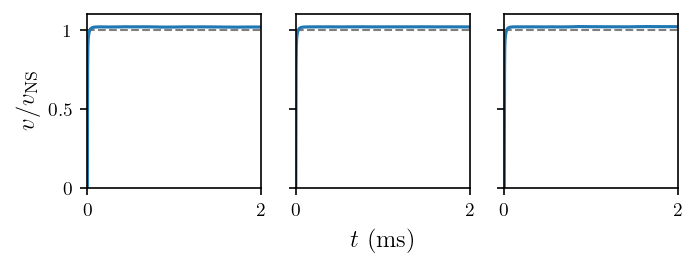

In [22]:
fig, ax = aux.plotVels(pusherParticleDf, neutralParticleDf, pullerParticleDf, -1)
plt.savefig("figs/error.pdf", format="pdf", transparent=True, bbox_inches="tight")
plt.show()

# Stability analysis

In [ ]:
def avgSpeed(df):
    return np.sqrt(df.fluidVelocity_x**2 + df.fluidVelocity_y**2).mean()

## pusher

In [ ]:
avgFluidSpeed = []
time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDirs[0] + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

In [ ]:
fig, ax = plt.subplots(figsize = (1.5,1.5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# neutral

In [ ]:
avgFluidSpeed = []
time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDirs[1] + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

In [ ]:
fig, ax = plt.subplots(figsize = (1.5,1.5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# puller

In [ ]:
avgFluidSpeed = []
time = []

for tick in ticks[len(time)::]:
    auxDf = pd.read_csv(dataDirs[2] + f"fluidTrj_{tick}.csv")
    avgFluidSpeed.append(avgSpeed(auxDf))
    time.append(auxDf.time.values[0])
    print(f'\r{tick}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

In [ ]:
fig, ax = plt.subplots(figsize = (1.5,1.5))

ax.plot(time, avgFluidSpeed)
ax.set_xlabel("$t ~ (\\mu \\mathrm{s})$")
ax.set_ylabel("$|u| ~ (\\mu \\mathrm{m} / \\mu \\mathrm{s})$")

plt.show()

# Animation

In [12]:
# necessary directories are created
# outputDir = f"frames"
# os.system(f'mkdir -p anims')
# os.system(f'mkdir -p {outputDir}')

outputDir2 = f"frames.particles"
os.system(f'mkdir -p {outputDir2}')

# domain size
# lims = 13

for tickId in range(len(ticks)):
    pusher = pd.read_csv(dataDirs[0] + f"fluidTrj_{ticks[tickId]}.csv").set_index(["id_x","id_y"]).sort_index()
    pusherParticleDf = pd.read_csv(dataDirs[0]+"particlesTrj.csv")
    
    # neutral = pd.read_csv(dataDirs[1] + f"fluidTrj_{ticks[tickId]}.csv").set_index(["id_x","id_y"]).sort_index()
    neutralParticleDf = pd.read_csv(dataDirs[1]+"particlesTrj.csv")
    
    # puller = pd.read_csv(dataDirs[2] + f"fluidTrj_{ticks[tickId]}.csv").set_index(["id_x","id_y"]).sort_index()
    pullerParticleDf = pd.read_csv(dataDirs[2]+"particlesTrj.csv")
    
    time = pusher.time.values[-1]
    
    # fig, axes = aux.squirmersOverview(pusher, neutral, puller, pusherParticleDf, neutralParticleDf, pullerParticleDf, lims)
    # fig.suptitle(f'$t = {time:.1f}$'+'$~ \\mu \\mathrm{s}$')

    # plt.savefig(f"{outputDir}/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
    # plt.close()
    
    fig, ax = aux.plotVels(pusherParticleDf, neutralParticleDf, pullerParticleDf, time)
    
    plt.savefig(f"{outputDir2}/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()
    
    print(f'\r{tickId}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

In [106]:
# ffmpeg is used to create the animation
os.system('rm -f anims/output.mp4')
mkAnimSh = f'ffmpeg -framerate 15 -i {outputDir}/%d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -loglevel quiet anims/output.mp4'
os.system(mkAnimSh)

0

In [13]:
# ffmpeg is used to create the animation
os.system('rm -f anims/output2.mp4')
mkAnimSh = f'ffmpeg -framerate 15 -i {outputDir2}/%d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -loglevel quiet anims/output2.mp4'
os.system(mkAnimSh)

0

In [ ]:
# # ffmpeg is used to create the animation
# os.system('rm -f anims/output.mp4')
# mkAnimSh = f'ffmpeg -framerate 15 -i {outputDir}/%d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -loglevel quiet anims/output.mp4'
# os.system(mkAnimSh)